In [1]:
import dill
dill.load_session('notebook_sbi_nfbl_200k_noY10000.db')

In [34]:
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
plt.style.use("seaborn-v0_8-whitegrid")
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['savefig.dpi'] = 600

In [6]:
posterior_sample = posterior.sample((50000,), x=observation_summary_statistics).numpy()

Drawing 50000 posterior samples:   0%|          | 0/50000 [00:00<?, ?it/s]

In [39]:
# Run the simulations for all the samples in posterior_sample, calculate the statistics for each one and store them in a matrix.
# Also, calculate the error between the simulations in the posterior_sample and the real data.

# calculate_summary_statistics(x, y): function that calculates the summary statistics for the given data.
# observation_trace.y[0]: the real X data.

from email import errors


attributes = calculate_summary_statistics(observation_trace.y[0], observation_trace.y[1])

errors_x = []
errors_y = []
errors_attributes = []

for i in range(np.shape(posterior_sample)[0]):
    if i % 10000 == 0: # Progress
        print(i)
    
    # Squared errors
    simulation = simulator(posterior_sample[i][0], posterior_sample[i][1], posterior_sample[i][2], posterior_sample[i][3], posterior_sample[i][4], posterior_sample[i][5])
    errors_x.append(np.sum((simulation.y[0] - observation_trace.y[0])**2))
    errors_y.append(np.sum((simulation.y[1] - observation_trace.y[1])**2))
    errors_attributes.append((calculate_summary_statistics(simulation.y[0], simulation.y[1]) - attributes)**2)

0
10000
20000
30000
40000


Text(0, 0.5, 'Squared error of X')

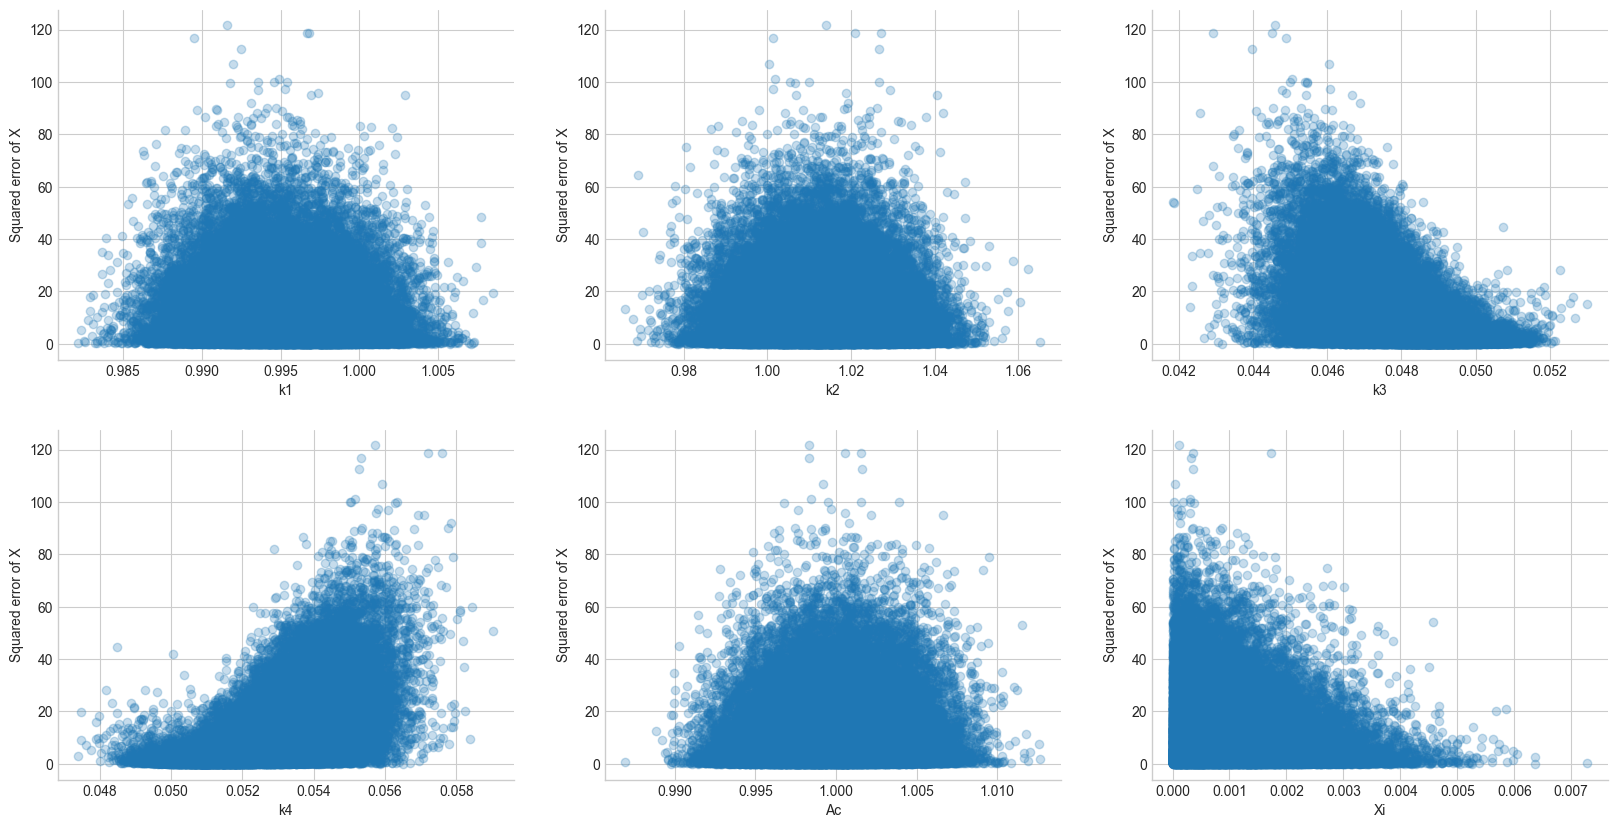

In [50]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].scatter(posterior_sample[:, 0], errors_x, alpha=0.25)
ax[0, 0].set_xlabel("k1")
ax[0, 0].set_ylabel("Squared error of X")

ax[0, 1].scatter(posterior_sample[:, 1], errors_x, alpha=0.25)
ax[0, 1].set_xlabel("k2")
ax[0, 1].set_ylabel("Squared error of X")

ax[0, 2].scatter(posterior_sample[:, 2], errors_x, alpha=0.25)
ax[0, 2].set_xlabel("k3")
ax[0, 2].set_ylabel("Squared error of X")

ax[1, 0].scatter(posterior_sample[:, 3], errors_x, alpha=0.25)
ax[1, 0].set_xlabel("k4")
ax[1, 0].set_ylabel("Squared error of X")

ax[1, 1].scatter(posterior_sample[:, 4], errors_x, alpha=0.25)
ax[1, 1].set_xlabel("Ac")
ax[1, 1].set_ylabel("Squared error of X")

ax[1, 2].scatter(posterior_sample[:, 5], errors_x, alpha=0.25)
ax[1, 2].set_xlabel("Xi")
ax[1, 2].set_ylabel("Squared error of X")